<img width="10%" alt="Naas" src="https://landen.imgix.net/jtci2pxwjczr/assets/5ice39g4.png?w=160"/>

# US Bureau of Labor Statistics - Follow CPI
<a href="https://app.naas.ai/user-redirect/naas/downloader?url=https://raw.githubusercontent.com/jupyter-naas/awesome-notebooks/master/template.ipynb" target="_parent">
<img src="https://img.shields.io/badge/-Open%20in%20Naas-success?labelColor=000000&logo="/>
</a>

**Tags:** #inflation #us #BLS #naas #scheduler #asset #snippet #automation #ai #analytics

**Author:** [Jeremy Ravenel](https://www.linkedin.com/in/j%C3%A9r%C3%A9my-ravenel-8a396910/)

The consumer price index (CPI) is the instrument used to measure inflation. It allows the estimation of the average variation between two given periods in the prices of products consumed by households. It is based on the observation of a fixed basket of goods updated every year.

The BLS provides us with a Python API: https://www.bls.gov/developers/api_python.html
Fortunately for us, the Python ecosystem is a supportive community of many open-source libraries, and thanks to data journalist Ben Welsh we have access to the CPI library with Python, which is a very nice wrapper around the BLS Python API that will save us a lot of work.

This template is inspired by the following article: https://pieriantraining.com/exploring-inflation-data-with-python/

## Input

### Setup libraries

In [ ]:
# Install CPI Python Package
!pip install cpi

In [2]:
import pandas as pd
import cpi
import seaborn as sns
import matplotlib.pyplot as plt
import naas
from naas_drivers import plotly

## Model

### Update CPI latest data
BLS is constantly updating with the latest inflation information

In [3]:
#this can take some time
cpi.update()

### Get monthly data

In [4]:
cpi_items_df = cpi.series.get(seasonally_adjusted=False).to_dataframe()
cpi_items_df = cpi_items_df[cpi_items_df['period_type']=='monthly']
cpi_items_df['date'] = pd.to_datetime(cpi_items_df['date'])
cpi_items_df = cpi_items_df.set_index('date')

### Show dataframe

In [5]:
df = cpi_items_df
df.head()

,year,value,series_id,series_title,series_survey,series_seasonally_adjusted,series_periodicity_id,series_periodicity_code,series_periodicity_name,series_area_id,...,series_area_name,series_items_id,series_items_code,series_items_name,period_id,period_code,period_abbreviation,period_name,period_month,period_type
date,,,,,,,,,,,,,,,,,,,,,
1997-01-01,1997,159.1,CUUR0000SA0,"All items in U.S. city average, all urban cons...",All urban consumers,False,R,R,Monthly,0000,...,U.S. city average,SA0,SA0,All items,M01,M01,JAN,January,1,monthly
1997-02-01,1997,159.6,CUUR0000SA0,"All items in U.S. city average, all urban cons...",All urban consumers,False,R,R,Monthly,0000,...,U.S. city average,SA0,SA0,All items,M02,M02,FEB,February,2,monthly
1997-03-01,1997,160.0,CUUR0000SA0,"All items in U.S. city average, all urban cons...",All urban consumers,False,R,R,Monthly,0000,...,U.S. city average,SA0,SA0,All items,M03,M03,MAR,March,3,monthly
1997-04-01,1997,160.2,CUUR0000SA0,"All items in U.S. city average, all urban cons...",All urban consumers,False,R,R,Monthly,0000,...,U.S. city average,SA0,SA0,All items,M04,M04,APR,April,4,monthly
1997-05-01,1997,160.1,CUUR0000SA0,"All items in U.S. city average, all urban cons...",All urban consumers,False,R,R,Monthly,0000,...,U.S. city average,SA0,SA0,All items,M05,M05,MAY,May,5,monthly


### Create plot

Text(0, 0.5, 'CPI Value')

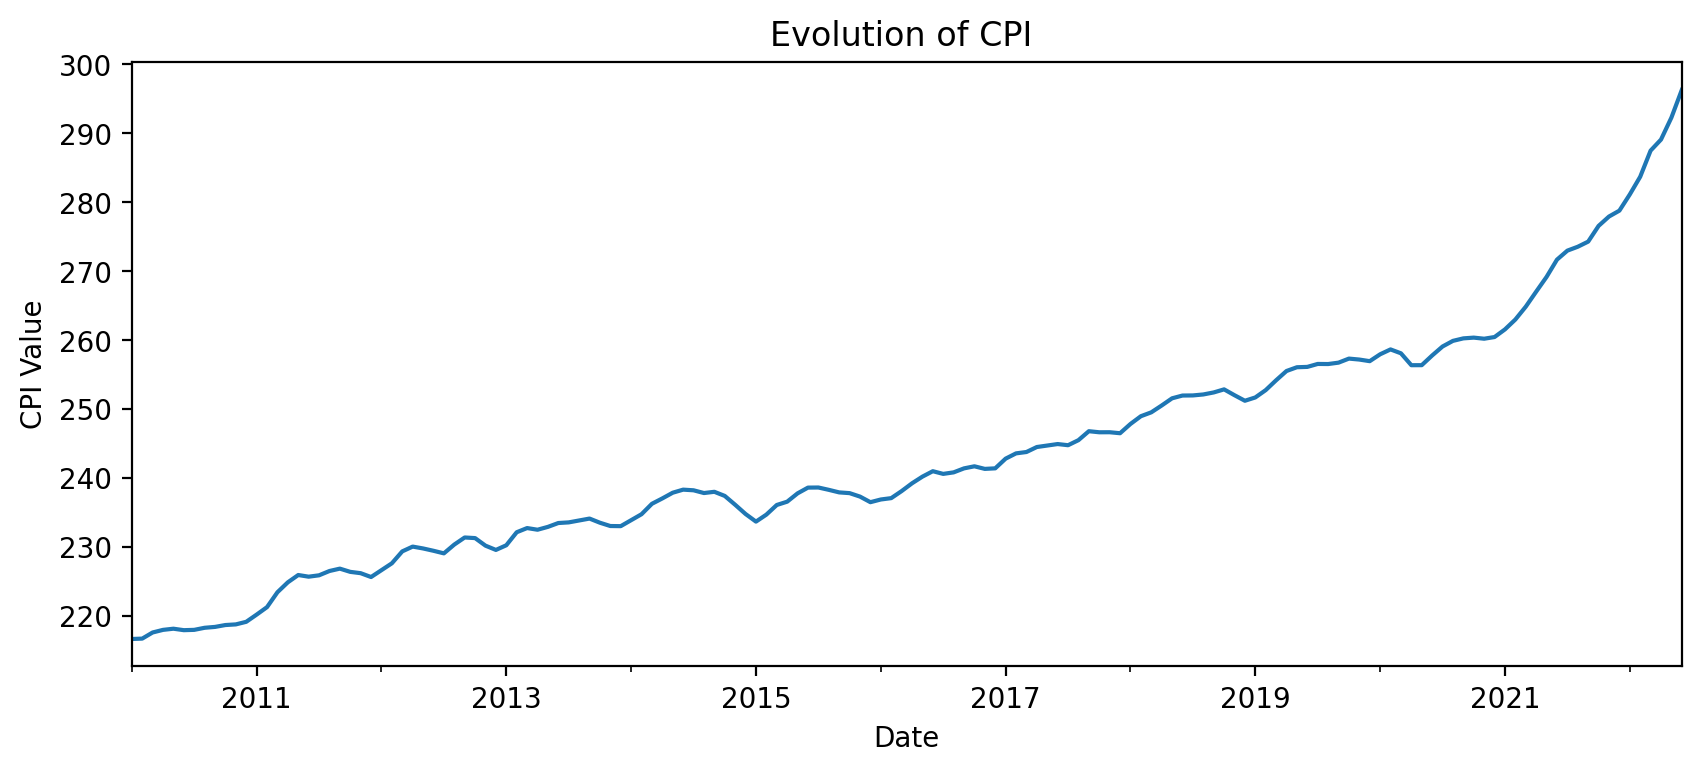

In [6]:
fig = plt.figure(dpi=200)
df['value'].loc['2010':'2023'].plot(figsize=(10,4))
plt.title('Evolution of CPI')
plt.xlabel('Date')
plt.ylabel('CPI Value')

### Simulate 2% inflation YOY

In [10]:
# Starting value
cpi_items_df['value'].loc['2010':'2023'].iloc[0]

start = cpi_items_df['value'].loc['2010':'2023'].iloc[0]

periods = len(cpi_items_df['value'].loc['2010':'2023'])//12

In [12]:
def get_target_cpi(previous_cpi):
    return previous_cpi + 0.02*(previous_cpi)

In [13]:
target_cpis = [start]
for year in range(0,periods):
    target_cpis.append(get_target_cpi(target_cpis[year]))
    
target_cpis

[216.687,
 221.02074000000002,
 225.44115480000002,
 229.949977896,
 234.54897745392,
 239.2399570029984,
 244.02475614305837,
 248.90525126591953,
 253.88335629123793,
 258.9610234170627,
 264.14024388540395,
 269.42304876311204,
 274.8115097383743]

In [14]:
dates = pd.date_range('2010-01-01','2023-01-01',periods=periods+1)
target_cpi_series = pd.Series(data =target_cpis, index= dates)

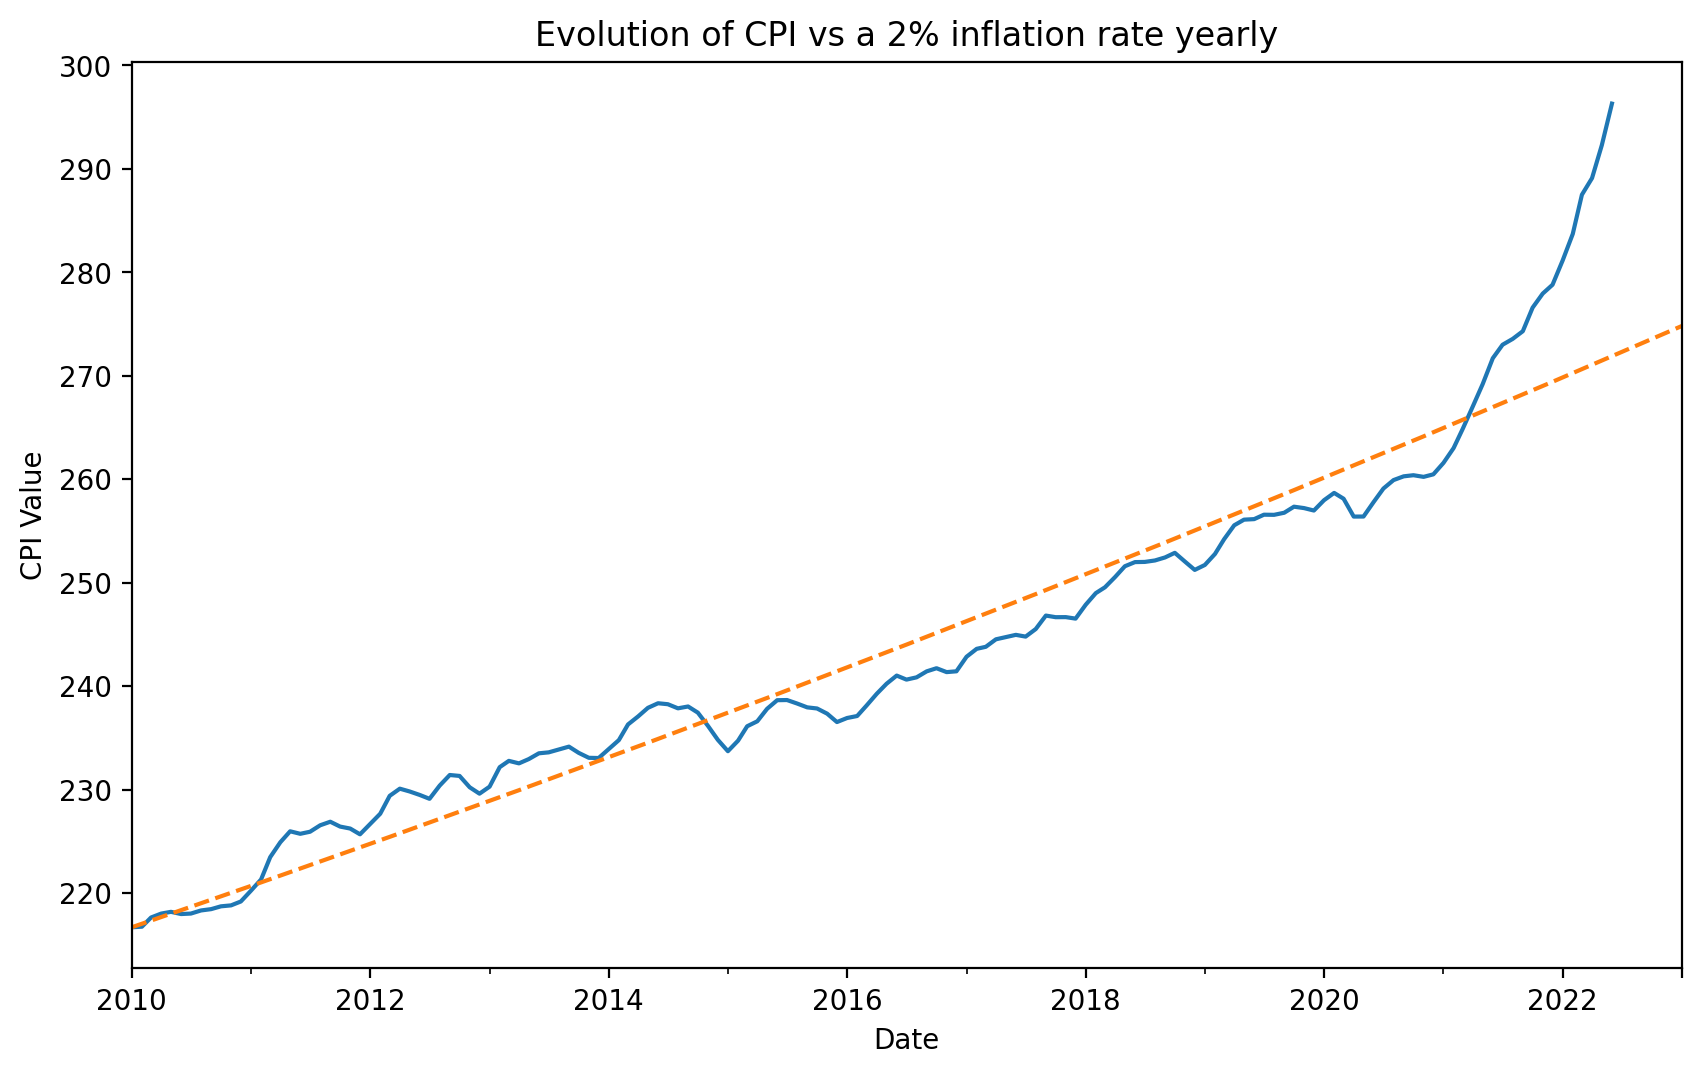

In [22]:
fig = plt.figure(dpi=200)
cpi_items_df['value'].loc['2010':'2023'].plot(figsize=(10,6))
target_cpi_series.plot(ls='--')
plt.title('Evolution of CPI vs a 2% inflation rate yearly')
plt.xlabel('Date')
plt.ylabel('CPI Value');

## Output

### Save result in png

In [20]:
plt.savefig("CPI.png")

<Figure size 432x288 with 0 Axes>

### Save result in csv

In [8]:
df.to_csv("CPI.csv", index=False)

### Share your output with naas

In [9]:
naas.asset.add("CPI.csv")
naas.asset.add("CPI.png")

#-> Uncomment the line below to remove your asset
# naas.asset.delete()

👌 Well done! Your Assets has been sent to production.



<IPython.core.display.Javascript object>

Button(button_style='primary', description='Copy URL', style=ButtonStyle())

Output()

PS: to remove the "Assets" feature, just replace .add by .delete
👌 Well done! Your Assets has been sent to production.



<IPython.core.display.Javascript object>

Button(button_style='primary', description='Copy URL', style=ButtonStyle())

Output()

PS: to remove the "Assets" feature, just replace .add by .delete


'https://public.naas.ai/amVyZW15LTQwbmFhcy0yRWFp/asset/2df2707590c9c8b218a666b9daed41f4823abd7fe92186b9eaac5fc04f16.png'